In [1]:
import weather_model_graphs as wmg
import numpy as np

In [2]:
def _create_fake_xy(N=10):
    x = np.linspace(0.0, N, N)
    y = np.linspace(0.0, N, N)
    xy_mesh = np.meshgrid(x, y)
    xy = np.stack([mg_coord.flatten() for mg_coord in xy_mesh], axis=1)  # Shaped (N, 2)
    return xy

2025-04-02 17:13:13.311 | DEBUG    | weather_model_graphs.create.base:create_all_graph_components:91 - No `coords_crs` given: Assuming `coords` contains in-projection Cartesian coordinates.


<Axes: >

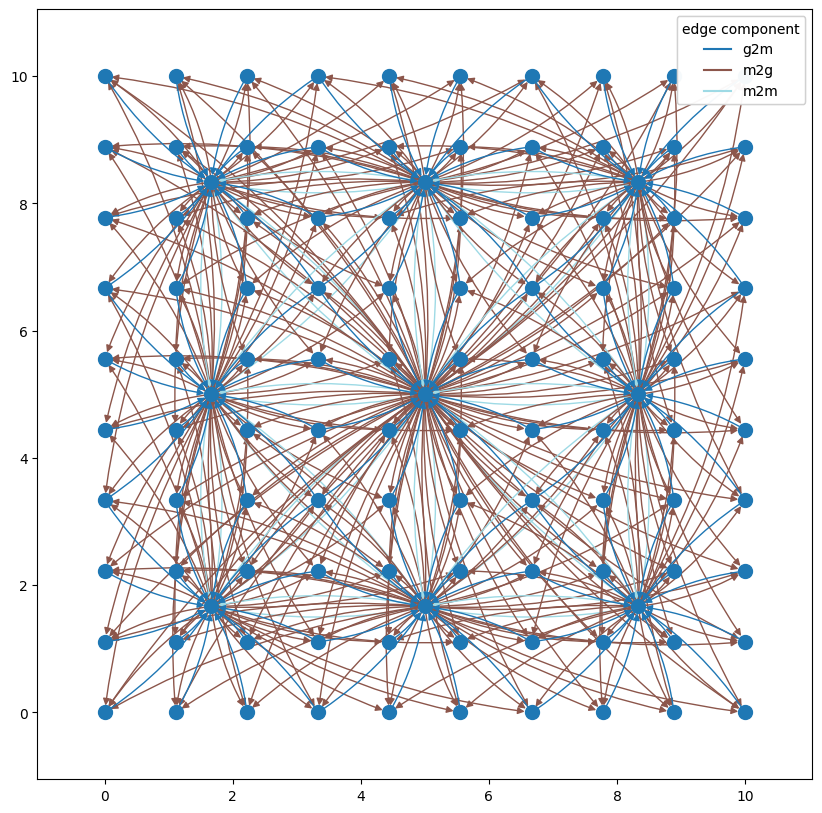

In [3]:
coords = _create_fake_xy()
graph = wmg.create.archetype.create_keisler_graph(coords=coords)

wmg.visualise.nx_draw_with_pos_and_attr(graph, edge_color_attr="component")

In [4]:
dt = wmg.save.graph_to_datatree(graph=graph, split_by="component")
dt

<xarray.DataTree 'root'>
Group: /
│   Dimensions:        (node: 2, edge_feature: 3, node_index: 109, node_feature: 2)
│   Coordinates:
│     * node           (node) <U9 72B 'src_index' 'dst_index'
│     * edge_feature   (edge_feature) <U7 84B 'len' 'vdiff:0' 'vdiff:1'
│     * node_index     (node_index) int64 872B 0 1 2 3 4 5 ... 104 105 106 107 108
│     * node_feature   (node_feature) <U5 40B 'pos:0' 'pos:1'
│   Data variables:
│       node_features  (node_index, node_feature) float64 2kB 1.667 1.667 ... 10.0
├── Group: /m2g
│       Dimensions:         (edge_index: 400, node: 2, edge_feature: 3)
│       Coordinates:
│         * edge_index      (edge_index) int64 3kB 3 4 5 6 7 8 ... 435 436 437 438 439
│       Data variables:
│           adjacency_list  (edge_index, node) int64 6kB 0 9 0 10 0 ... 106 8 107 8 108
│           edge_features   (edge_index, edge_feature) float64 10kB 2.357 ... -1.667
│       Attributes:
│           component:  m2g
├── Group: /m2m
│       Dimensions:         (edge_index: 40, node: 2, edge_feature: 3)
│       Coordinates:
│         * edge_index      (edge_index) int64 320B 0 1 2 36 37 ... 361 362 406 407 408
│       Data variables:
│           adjacency_list  (edge_index, node) int64 640B 0 3 0 1 0 4 1 ... 8 5 8 7 8 4
│           edge_features   (edge_index, edge_feature) float64 960B 3.333 ... 3.333
│       Attributes:
│           component:  m2m
└── Group: /g2m
        Dimensions:         (edge_index: 144, node: 2, edge_feature: 3)
        Coordinates:
          * edge_index      (edge_index) int64 1kB 440 441 442 443 ... 580 581 582 583
        Data variables:
            adjacency_list  (edge_index, node) int64 2kB 9 0 10 0 11 0 ... 8 107 8 108 8
            edge_features   (edge_index, edge_feature) float64 3kB 2.357 ... 1.667
        Attributes:
            component:  g2m

In [5]:
graph_reconstructed = wmg.load.datatree_to_graph(dt)

<Axes: >

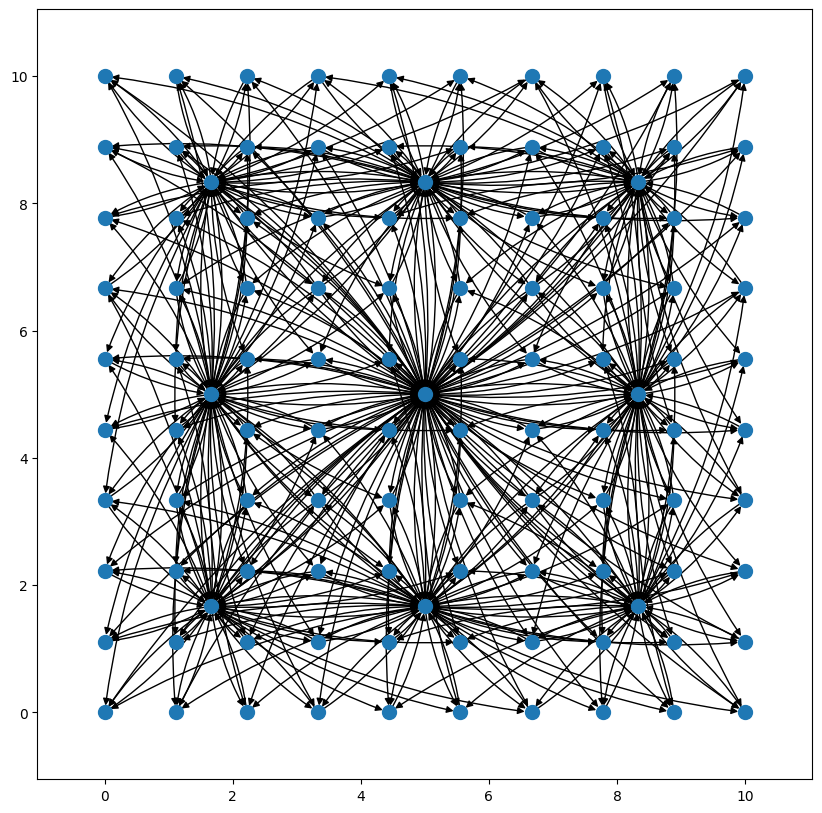

In [6]:
wmg.visualise.nx_draw_with_pos_and_attr(
    graph_reconstructed,
    # edge_color_attr="component",
)